# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from matplotlib import animation
import cv2
from PIL import Image
import io
from sklearn.preprocessing import MinMaxScaler

#   Load Data

In [2]:
res = np.load("data\mariel_beyond.npy")
#res=np.load("ninth.npy")

In [8]:
res.shape

(55, 6803, 3)

In [3]:
np.array(res).shape

(55, 6803, 3)

In [4]:
joints_data=np.array(res)

In [5]:
arr_reshaped = joints_data.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
# Fit and transform the array
normalized_arr_reshaped = scaler.fit_transform(arr_reshaped)
# Reshape the normalized array back to original shape
joints_data = normalized_arr_reshaped.reshape(joints_data.shape)

# Visualize whole sequence

In [8]:
"""fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([0, -3])
ax.set_ylim([0, -3])
ax.set_zlim([1, 2.5])

def animate(i):
    reshaped_data = joints_data[:, i, :]
    for landmarks in reshaped_data:
        x_value=landmarks[0]
        y_value=landmarks[1]
        z_value=-landmarks[2]
        ax.scatter(x_value, y_value, z_value, c='r', marker='.')
    return plt.figure()
        
ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=150, interval=50)  

print("saving")
writer = animation.PillowWriter(fps=15)
ani.save('scatter.gif', writer=writer)

plt.show()"""

'fig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')\n\nax.set_xlim([0, -3])\nax.set_ylim([0, -3])\nax.set_zlim([1, 2.5])\n\ndef animate(i):\n    reshaped_data = joints_data[:, i, :]\n    for landmarks in reshaped_data:\n        x_value=landmarks[0]\n        y_value=landmarks[1]\n        z_value=-landmarks[2]\n        ax.scatter(x_value, y_value, z_value, c=\'r\', marker=\'.\')\n    return plt.figure()\n        \nani = animation.FuncAnimation(fig, animate, repeat=True,\n                                    frames=150, interval=50)  \n\nprint("saving")\nwriter = animation.PillowWriter(fps=15)\nani.save(\'scatter.gif\', writer=writer)\n\nplt.show()'

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
frame: 100

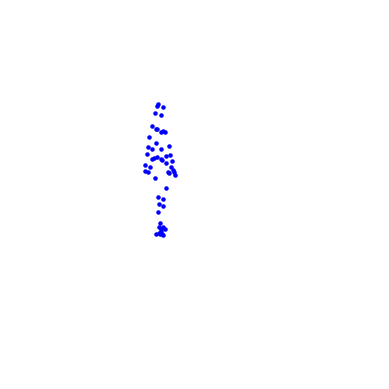

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('off')

def custom_round(num):
    if num > 0:
        return np.ceil(num * 10) / 10
    else:
        return np.floor(num * 10) / 10
    
x_coordinates = joints_data[:, :, 0]
y_coordinates = joints_data[:, :, 1]
z_coordinates = joints_data[:, :, 2]

limit = [custom_round(np.min(x_coordinates)), custom_round(np.max(x_coordinates)), 
         custom_round(np.min(y_coordinates)), custom_round(np.max(y_coordinates)), 
         custom_round(np.min(z_coordinates)), custom_round(np.max(z_coordinates))]

#np.save("limits", limit)

def animate(i):
    reshaped_data = joints_data[:, i, :]
    ax.clear()
    
    # Set limits
    ax.set_xlim([limit[0], limit[1]])
    ax.set_ylim([limit[2], limit[3]])
    ax.set_zlim([limit[5], limit[4]])
        
    # Remove grid and ticks
    ax.grid(True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis('off')
    
    # Plot each landmark
    for landmarks in reshaped_data:
        ax.scatter(*landmarks, c='b', marker='.')
        
    # Save the figure to a BytesIO object
    buf = io.BytesIO()
    fig.savefig(buf, format='jpg')
    buf.seek(0)
    img = Image.open(buf)
    img_array = np.array(img)
    return img_array

def visualize(timestep):
    plt.axis('off')
    fourcc = cv2.VideoWriter_fourcc(*'XVID') 
    result = cv2.VideoWriter('output.avi', fourcc, 25.0, (480, 360)) 
    for i in range (0,timestep):
        print("frame:",i)
        frame = animate(i)
        frame = cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR)
        frame = frame[60:420, 80:560]  # Crop the frame
        result.write(frame)
        cv2.imshow('Frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    result.release() 
    cv2.destroyAllWindows()

visualize(125)